In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-trig-interp)

We will get a cardinal function without using an explicit formula, just by passing data that is 1 at one node and 0 at the others.
```{tip}
:class: dropdown
The operator `÷`, typed as `\div` then <kbd>Tab</kbd>, returns the quotient without remainder of two integers.
```

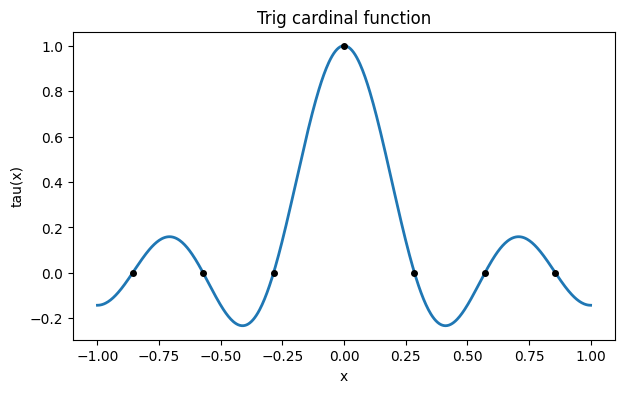

In [2]:
N = 7
n = int((N - 1) / 2)
t = 2 * arange(-n, n + 1) / N
y = zeros(N)
y[n] = 1

p = FNC.triginterp(t, y)
x = linspace(-1, 1, 600)
plot(x, p(x))
plot(t, y, "ko")

xlabel("x"),  ylabel("tau(x)")
title("Trig cardinal function");

Here is a 2-periodic function and one of its interpolants.

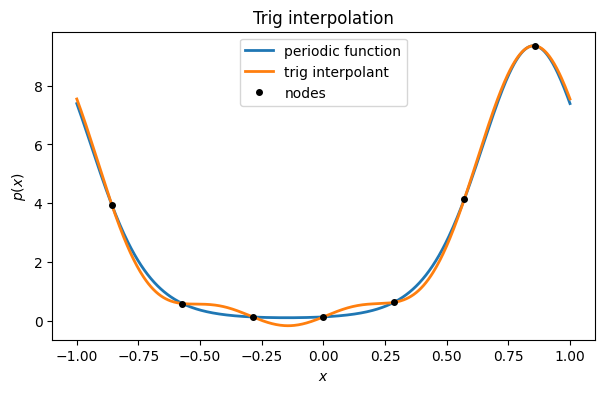

In [3]:
f = lambda x: exp(sin(pi * x) - 2 * cos(pi * x))

plot(x, f(x), label="periodic function")
y = f(t)

p = FNC.triginterp(t, y)
plot(x, p(x), label="trig interpolant")
plot(t, y, "ko", label="nodes")

xlabel("$x$"),  ylabel("$p(x)$")
legend(),  title("Trig interpolation");

The convergence of the interpolant is spectral. We let $N$ go needlessly large here in order to demonstrate that unlike polynomials, trigonometric interpolation is stable on equally spaced nodes. Note that when $N$ is even, the value of $n$ is not an integer but works fine for defining the nodes.

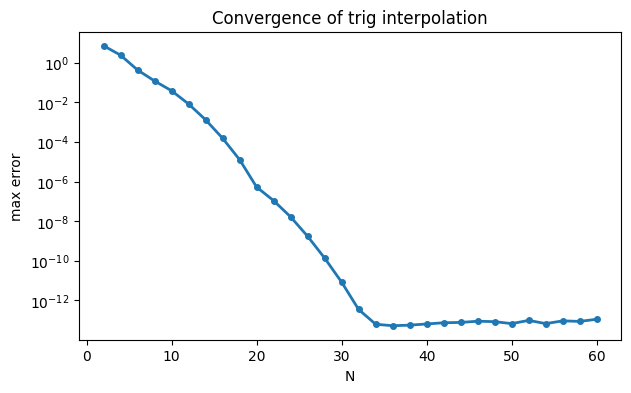

In [4]:
N = arange(2, 62, 2)
err = zeros(N.size)

x = linspace(-1, 1, 1601)    # for measuring error
for k in range(N.size):
    n = (N[k] - 1) / 2
    t = 2 * arange(-n, n + 1) / N[k]
    p = FNC.triginterp(t, f(t))
    err[k] = max(abs(f(x) - p(x)))

semilogy(N, err, "-o")
xlabel("N"),  ylabel("max error")
title("Convergence of trig interpolation");